# Actualizaciones, Metas e Ideas

Actualizaciones
1.   Callback Checkpoint
2.   

Metas


1.   Probar otros modelos mediante transferlearning
2.   Implementar K fold cross validation 
3.   Probar un data set (cancer detection)

Ideas


1.   Elemento de lista
2.   Elemento de lista




# Definir dimension de imagen

In [ ]:
# Dimensiones de la imagen HxW
input_height = 300
input_weight = 300
#batch
batch_size = 20

# Importar modelos mediante tranfer learning

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (input_height , input_weight, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-02-19 08:51:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   187MB/s    in 0.4s    

2021-02-19 08:51:25 (187 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 17, 17, 768)


# Ultima capa de aprendizaje

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(2000,kernel_regularizer='l2', activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.5)(x)
# Add a fully connected layer with 1,024 hidden units,kernel_regularization"L2" and ReLU activation
x = layers.Dense(1024, kernel_regularizer='l2',activation="relu")(x)             
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification -- OUtPUT
x = layers.Dense  (6, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Rocket science


In [ ]:
#model.summary()

# Abrir dataset desde colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importar Dataset desde kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chrisart10","key":"a4d7a5ccdb579a3da96cba78228ec9c6"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Pegar Api del dataset

API fruits fresh and rotten dataset

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [01:06<00:00, 62.1MB/s]
100% 3.58G/3.58G [01:06<00:00, 58.1MB/s]


API skin cancer mnist dataset

In [ ]:
#!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [01:49<00:00, 36.5MB/s]
100% 5.20G/5.20G [01:49<00:00, 50.8MB/s]


# Extraer zip

In [ ]:
import os
import zipfile

#local_zip = '/content/skin-cancer-mnist-ham10000.zip'
local_zip = "/content/fruits-fresh-and-rotten-for-classification.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

 # Image data preprocessing
[ImageDataPreprocessing Keras Documentation](https://keras.io/api/preprocessing/image/)

[ImageDataPreprocessing TF documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

[Youtube Tutorial](https://youtu.be/q7ZuZ8ZOErE)

# Preparar Dataset y asignar data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
base_dir = '/tmp/dataset/'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'test')
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=["freshapples",
                                                             "freshbanana",
                                                             "freshoranges",
                                                             "rottenapples",
                                                             "rottenbanana",
                                                             "rottenoranges"],
                                                    color_mode="rgb",
                                                    batch_size = batch_size,
                                                    shuffle=True,
                                                    class_mode = 'categorical',
                                                    target_size = (input_height, input_weight))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  valid_datagen.flow_from_directory( validation_dir,
                                                         classes=["freshapples",
                                                             "freshbanana",
                                                             "freshoranges",
                                                             "rottenapples",
                                                             "rottenbanana",
                                                             "rottenoranges"],
                                                         color_mode="rgb",
                                                         batch_size  = batch_size,
                                                          shuffle=True,
                                                         class_mode  = 'categorical', 
                                                         target_size = (input_height, input_weight))

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
#info
print(train_generator.class_indices)
print(train_generator.class_mode)
print(train_generator.image_shape)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
categorical
(300, 300, 3)


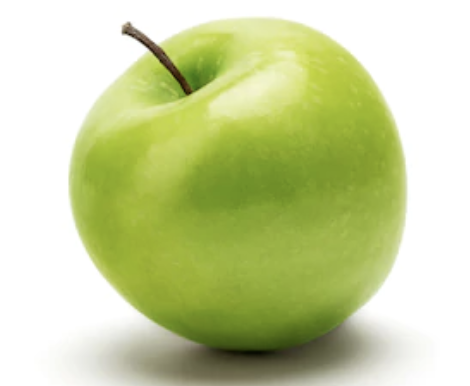

In [ ]:
from PIL import Image
PIL.Image.open("/tmp/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png")

# Callbacks API 
[Callbacks Keras Documentation](https://keras.io/api/callbacks)

[Callbacks TF Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)



# Callback Checkpoint

In [ ]:
# checkpoint_filepath = '/tmp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# # Model weights are saved at the end of every epoch, if it's the best seen
# # so far.
# model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# #  The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)


# Early stopping


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') >= 0.98):
                print("\nReached 98% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

# Entrenar el modelo

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 32,
            epochs = 2,
            callbacks=[callbacks],
            validation_steps = 32,
            verbose = 1)

Epoch 1/2
32/32 [==============================] - 34s 665ms/step - loss: 44.0886 - accuracy: 0.2852 - val_loss: 24.8880 - val_accuracy: 0.7500
Epoch 2/2
32/32 [==============================] - 21s 645ms/step - loss: 23.5550 - accuracy: 0.5404 - val_loss: 17.7725 - val_accuracy: 0.8250


# visualizacion del aprendizaje

<Figure size 432x288 with 0 Axes>

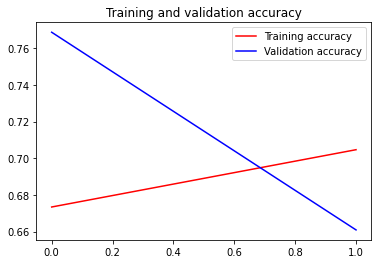

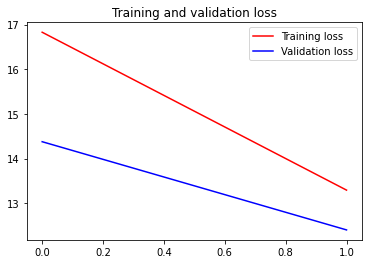

<Figure size 432x288 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()

# Test del modelo 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(input_height, input_weight))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes[0])
  print(np.argmax(classes[0]))
  
  # if classes[0]>0.5:
  #   print(fn + " is a dog")
  # else:
  #   print(fn + " is a cat")

Saving orange.png to orange (4).png
[1. 0. 0. 0. 0. 0.]
0


# Forma de guardar Opcion 1

In [ ]:
import time
path = '/tmp/simple_keras_model'
model.save(saved_model_path)

In [ ]:
new_model = tf.keras.models.load_model('/tmp/saved_models/1612553978/')

# Check its architecture
#new_model.summary()


NameError: ignored

# Forma de guardar opcion 2

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/tmp/saved_models/versions/my_model1.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/tmp/saved_models/versions/my_model1.h5')

# Show the model architecture
#new_model.summary()

NameError: ignored